In [1]:
import os
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [5]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
# reshape the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [7]:
# label encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [8]:
# normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [15]:
# build model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

num_classes = 10

model = Sequential()
model.add(Conv2D(32, (5, 5), strides=1, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(16, (5, 5), strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          12816     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 16,218
Trainable params: 16,218
Non-trainable params: 0
__________________________________________________

In [17]:
X_train.shape

(54000, 28, 28, 1)

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
  shear_range=0.2,
  zoom_range=0.2,
  rotation_range=15,
)

In [20]:
batch_size = 10
epochs = 25

history = model.fit_generator(
  train_datagen.flow(X_train, y_train, batch_size=batch_size),
  steps_per_epoch=len(X_train) // batch_size,
  validation_data=(X_val, y_val),
  validation_steps=len(X_val) // batch_size,
  epochs=epochs
)

E:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
5400/5400 [==============================] - 54s 10ms/step - loss: 0.3861 - accuracy: 0.8762 - val_loss: 0.0567 - val_accuracy: 0.9823
Epoch 2/25
5400/5400 [==============================] - 54s 10ms/step - loss: 0.0868 - accuracy: 0.9728 - val_loss: 0.0452 - val_accuracy: 0.9855
Epoch 3/25
5400/5400 [==============================] - 56s 10ms/step - loss: 0.0697 - accuracy: 0.9779 - val_loss: 0.0400 - val_accuracy: 0.9872
Epoch 4/25
5400/5400 [==============================] - 54s 10ms/step - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.0402 - val_accuracy: 0.9892
Epoch 5/25
5400/5400 [==============================] - 51s 9ms/step - loss: 0.0468 - accuracy: 0.9853 - val_loss: 0.0392 - val_accuracy: 0.9887
Epoch 6/25
5400/5400 [==============================] - 51s 9ms/step - loss: 0.0415 - accuracy: 0.9867 - val_loss: 0.0376 - val_accuracy: 0.9905
Epoch 7/25
5400/5400 [==============================] - 50s 9ms/step - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0359 - va

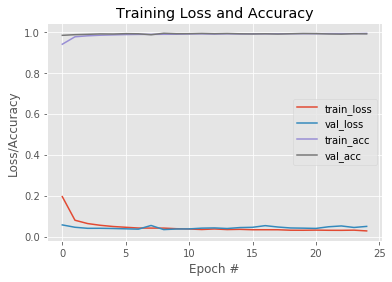

In [21]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [22]:
Y_predict = model.predict(X_test, batch_size=batch_size)
pred_idx = np.argmax(Y_predict, axis=1)

from sklearn.metrics import classification_report

# show a nicely formatted classification report
print(classification_report(y_test.argmax(axis=1), pred_idx, target_names= [str(c) for c in range(10)]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [23]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy: {:.4f}".format(scores[1]))

Test accuracy: 0.9907


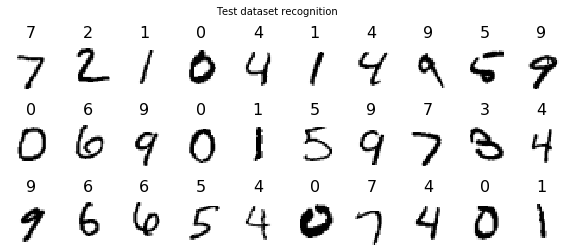

In [26]:
# plot the images in a grid
size = 30
rows = 3
f = plt.figure(figsize=(size // rows, rows + 1))
plt.suptitle("Test dataset recognition", fontsize=10)
for i in range(size):
    sp = f.add_subplot(rows, -(-size // rows), i + 1)
    sp.axis('Off')
    plt.imshow(X_test[i][:,:,0], cmap='gray_r')
    sp.set_title(Y_predict[i].argmax(), fontsize=16)

plt.savefig('test_dataset_recognition.png')

In [25]:
# %rm digitdemo1.h5
model.save('digitdemo1.h5')